In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

from sklearn.neighbors import KNeighborsClassifier

### Get fit data ready

In [2]:
# ValueError: could not convert string to float: '8789-0'
def read_data_partial(given_fname, output_fname, lim=399999):
    try:
        data = pd.read_csv(given_fname,index_col=False,engine='python',nrows=lim)
        data.to_csv(output_fname)
    except:
        content = []
        count = 1

        with open(given_fname, 'r') as fr:
            for line in fr:
                if count <= lim:
                    #print(type(line), line)
                    content.append(line)
                    count += 1
        with open(output_fname, 'w') as fw:
            for line in content:
                # print(type(line), line)
                fw.write(line)

        data = pd.read_csv(output_fname, index_col=False,encoding= res_encoding,engine='python')

    return data

In [3]:
qso_train_partial = read_data_partial('quasar_train_catalog.csv', 'qso_train_partial.csv')
qso_train_drop = qso_train_partial[['z', 'r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_train_drop = qso_train_drop.replace(99.99, np.nan).dropna()
qso_train_drop = qso_train_drop[qso_train_drop['z'] < 7.5]
qso_train_drop = qso_train_drop[(qso_train_drop['r_LSST_magerr']>0.2)&(qso_train_drop['i_LSST_magerr']>0.2)]
redshifts26 = qso_train_drop[qso_train_drop['z_LSST_mag'] > 22.0]
redshifts26 = redshifts26[redshifts26['z_LSST_mag'] < 26.0]
redshifts26 = redshifts26['z']
qso_train_drop = qso_train_drop.drop(columns=['z', 'r_LSST_magerr', 'i_LSST_magerr'])
print('qso_train_catalog_z.csv partial data description: ')
qso_train_drop.describe()

qso_train_catalog_z.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,20759.000000,20759.000000,20759.000000,20759.000000,20759.000000,20759.000000
mean,28.576193,26.616020,24.340320,24.201112,24.264969,24.132527
std,1.218340,1.654428,2.009015,2.089360,2.112093,2.108081
min,26.672280,23.064283,18.489759,17.989148,17.800595,17.633615
25%,27.689657,25.314514,23.136710,22.977195,23.069490,22.937156
50%,28.366448,26.540555,24.371926,24.306130,24.363508,24.192066
75%,29.189413,27.668971,25.789820,25.697926,25.766767,25.595761
max,38.902328,36.769079,32.115011,32.168396,32.742341,33.953075


(array([1986., 1725., 1511., 1102.,   95.,   74.,  366.,  489.,  380.,
         271.]),
 array([6.0001027 , 6.15004544, 6.29998818, 6.44993092, 6.59987366,
        6.7498164 , 6.89975914, 7.04970188, 7.19964462, 7.34958736,
        7.4995301 ]),
 <BarContainer object of 10 artists>)

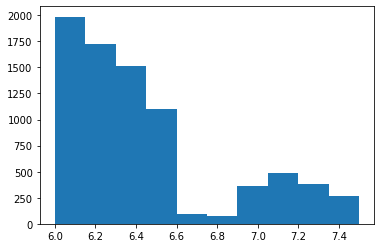

In [4]:
plt.hist(redshifts26)

In [5]:
# brown dwarf contaminants
mlt_train_partial = read_data_partial('mlt_train_catalog.csv', 'mlt_train_partial.csv', 599999)
mlt_train_drop = mlt_train_partial[['r_LSST_magerr', 'i_LSST_magerr', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_train_drop = mlt_train_drop.replace(99.99, np.nan).dropna()
mlt_train_drop = mlt_train_drop[(mlt_train_drop['r_LSST_magerr']>0.2)&(mlt_train_drop['i_LSST_magerr']>0.2)]
mlt_train_drop = mlt_train_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('mlt_train_catalog_z.csv partial data description: ')
mlt_train_drop.describe()

mlt_train_catalog_z.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,40215.000000,40215.000000,40215.000000,40215.000000,40215.000000,40215.000000
mean,27.846360,26.406950,24.814468,24.240156,23.941957,23.954919
std,0.866560,0.814595,0.652294,0.636044,0.633295,0.639822
min,26.565172,24.640153,22.966413,22.249321,21.884903,21.705643
25%,27.248318,25.848575,24.336096,23.782861,23.500746,23.511528
50%,27.631539,26.262382,24.722558,24.157091,23.877018,23.890470
75%,28.184954,26.792510,25.207169,24.619578,24.324022,24.337251
max,38.215437,36.198974,28.369839,27.735964,27.180561,27.305963


In [6]:
galaxies_patch8789_partial = read_data_partial('galaxies_train_catalog_patch8789.csv', 'galaxies_patch8789_partial.csv')
galaxies_patch8789_drop = galaxies_patch8789_partial[['r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8789_drop = galaxies_patch8789_drop.replace(99.99, np.nan).dropna()
galaxies_patch8789_drop = galaxies_patch8789_drop[(galaxies_patch8789_drop['r_LSST_magerr']>0.2)&(galaxies_patch8789_drop['i_LSST_magerr']>0.2)]
galaxies_patch8789_drop = galaxies_patch8789_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8789.csv partial data description: ')
galaxies_patch8789_drop.describe()

galaxies_train_catalog_patch8789.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,166180.000000,166180.000000,166180.000000,166180.000000,166180.000000,166180.000000
mean,28.112741,27.507701,27.330679,27.226355,27.160891,27.154280
std,0.888656,0.950758,0.788433,0.796900,0.827853,0.977009
min,26.647539,25.462982,25.152190,24.748167,24.475726,24.258516
25%,27.518918,26.883531,26.837638,26.737179,26.657671,26.557470
50%,27.920273,27.314756,27.248012,27.172407,27.118375,27.041903
75%,28.465759,27.895376,27.710084,27.634895,27.594613,27.601858
max,40.029429,39.261958,39.647494,40.707497,38.204669,38.379259


In [7]:
galaxies_patch8786_partial = read_data_partial('galaxies_train_catalog_patch8786.csv', 'galaxies_patch8786_partial.csv')
galaxies_patch8786_drop = galaxies_patch8786_partial[['r_LSST_magerr', 'i_LSST_magerr','i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8786_drop = galaxies_patch8786_drop.replace(99.99, np.nan).dropna()
galaxies_patch8786_drop = galaxies_patch8786_drop[(galaxies_patch8786_drop['r_LSST_magerr']>0.2)&(galaxies_patch8786_drop['i_LSST_magerr']>0.2)]
galaxies_patch8786_drop = galaxies_patch8786_drop.drop(columns=['r_LSST_magerr', 'i_LSST_magerr'])
print('galaxies_train_catalog_patch8786.csv partial data description: ')
galaxies_patch8786_drop.describe()

galaxies_train_catalog_patch8786.csv partial data description: 


,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,156947.000000,156947.000000,156947.000000,156947.000000,156947.000000,156947.000000
mean,28.100850,27.494201,27.312886,27.205306,27.141588,27.131087
std,0.886176,0.952283,0.787836,0.803831,0.842035,0.981599
min,26.573603,25.553776,25.107279,24.705397,24.460871,24.280885
25%,27.507437,26.871509,26.818015,26.714655,26.633409,26.535319
50%,27.905555,27.298765,27.235464,27.156027,27.102194,27.024863
75%,28.452905,27.883030,27.697065,27.620381,27.584424,27.588149
max,40.812877,40.422024,37.436853,38.037623,37.411129,37.630643


In [8]:
qso_train_drop['label'] = np.ones(len(qso_train_drop))
mlt_train_drop['label'] = np.zeros(len(mlt_train_drop))
galaxies_patch8789_drop['label'] = np.zeros(len(galaxies_patch8789_drop))
galaxies_patch8786_drop['label'] = np.zeros(len(galaxies_patch8786_drop))

In [9]:
# data concatenation to get training data
contaminants_drop = pd.concat([mlt_train_drop, galaxies_patch8789_drop, galaxies_patch8786_drop], ignore_index=True)
data_train_drop = pd.concat([qso_train_drop, contaminants_drop], ignore_index=True) # make sure that the data line up
X_drop = data_train_drop[['i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop = data_train_drop['label']

In [10]:
qso_train_26 = qso_train_drop[qso_train_drop['z_LSST_mag'] > 24.0]
qso_train_26 = qso_train_26[qso_train_26['z_LSST_mag'] < 26.0]
print(len(qso_train_26))
mlt_train_26 = mlt_train_drop[mlt_train_drop['z_LSST_mag'] > 24.0]
mlt_train_26 = mlt_train_26[mlt_train_26['z_LSST_mag'] < 26.0]
print(len(mlt_train_26))
galaxies_patch8789_26 = galaxies_patch8789_drop[galaxies_patch8789_drop['z_LSST_mag'] > 24.0]
galaxies_patch8789_26 = galaxies_patch8789_26[galaxies_patch8789_26['z_LSST_mag'] < 26.0]
print(len(galaxies_patch8789_26))
galaxies_patch8786_26 = galaxies_patch8786_drop[galaxies_patch8786_drop['z_LSST_mag'] > 24.0]
galaxies_patch8786_26 = galaxies_patch8786_26[galaxies_patch8786_26['z_LSST_mag'] < 26.0]
print(len(galaxies_patch8786_26))

7514
13791
778
753


In [11]:
contaminants_26 = pd.concat([mlt_train_26, galaxies_patch8789_26, galaxies_patch8786_26], ignore_index=True)
data_train_26 = pd.concat([qso_train_26, contaminants_26], ignore_index=True)
X_drop_26 = data_train_26[['i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop_26 = data_train_26['label']

## KNN filters

In [12]:
# 1a
# x: z_LSST_mag-J_WFI_mag
# y: Y_WFI_mag-H_WFI_mag
# best score:  0.9881756756756758
filter1a = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=3)
features1a = [X_drop_26['z_LSST_mag']-X_drop_26['J_WFI_mag'], X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag']]
X1a = np.array(features1a).transpose()

filter1a.fit(X1a, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=3)

In [13]:
# 1b
# x: Y - H 
# y: i - H
# best score:  0.9938063063063063
filter1b = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=13, leaf_size=3, weights='uniform', p=5)
features1b = [X_drop_26['Y_WFI_mag']-X_drop_26['H_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['H_WFI_mag']]
X1b = np.array(features1b).transpose()

filter1b.fit(X1b, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=13, p=5)

In [14]:
# 1c 
# x: z - H
# y: J - H
# best score:  0.9463213213213213
filter1c = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=36, leaf_size=3, weights='uniform', p=5)
features1c = [X_drop_26['z_LSST_mag']-X_drop_26['H_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1c = np.array(features1c).transpose()

filter1c.fit(X1c, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=36, p=5)

In [15]:
# 1d
# x: z_LSST_mag-Y_WFI_mag
# y: i_LSST_mag-F_WFI_mag
# best score:  0.9678428428428428
filter1d = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=45, leaf_size=3, weights='uniform', p=5)
features1d = [X_drop_26['z_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['i_LSST_mag']-X_drop_26['F_WFI_mag']]
X1d = np.array(features1d).transpose()

filter1d.fit(X1d, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=45, p=5)

In [16]:
# 1e
# Y - J
# J - H
# best score: deleted, assume 0.95
filter1e = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1e = [X_drop_26['Y_WFI_mag']-X_drop_26['J_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1e = np.array(features1e).transpose()

filter1e.fit(X1e, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

In [17]:
# 1f
# x: i - Y
# y: J - H
# best score:  0.9161036036036035
filter1f = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=26, leaf_size=3, weights='uniform', p=3)
features1f = [X_drop_26['i_LSST_mag']-X_drop_26['Y_WFI_mag'], X_drop_26['J_WFI_mag']-X_drop_26['H_WFI_mag']]
X1f = np.array(features1f).transpose()

filter1f.fit(X1f, Y_drop_26)

KNeighborsClassifier(leaf_size=3, n_neighbors=26, p=3)

# Test (J <= 25.5)

In [64]:
# retrieve redshift for later usage
qso_test = pd.read_csv('Pq_test_qsoLF_WFI_abmag_wl_2150_J180J255_1130_10r.csv', index_col=False)
qso_test = qso_test[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]
qso_test = qso_test.replace(99.99, np.nan).dropna()
# qso_test = qso_test[(qso_test['z']>7.0)&(qso_test['z']<7.5)]
qso_test.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,28.460931,27.229672,23.628574,23.393529,23.487835,23.391884
std,1.432419,1.563199,1.322967,1.274028,1.298215,1.310768
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814
25%,27.664371,26.336379,22.706429,22.489887,22.584211,22.473988
50%,28.413087,27.238952,23.732590,23.535600,23.616137,23.514534
75%,29.201439,28.083801,24.641570,24.422242,24.558752,24.462191
max,36.322512,33.615849,29.746760,25.498570,25.671004,25.823568


In [19]:
qso_test['index']

0           qsoLF-1
3       qsoLF-24586
4       qsoLF-16397
5       qsoLF-16399
6       qsoLF-24592
           ...     
2144    qsoLF-24535
2146    qsoLF-24539
2147    qsoLF-16362
2148    qsoLF-24559
2149    qsoLF-24569
Name: index, Length: 1148, dtype: object

In [21]:
'''
frac = 1/3

# Calculate the number of rows for each sample
num_rows = len(qso_test)
num_sample1 = int(num_rows * frac)
num_sample3 = num_rows - 2*num_sample1

# Create three samples
qso_sample1 = qso_test.copy().sample(n=num_sample1, replace=False)
remaining_rows = qso_test.copy().drop(qso_sample1.index)
qso_sample2 = remaining_rows.sample(n=num_sample1, replace=False)
qso_sample3 = remaining_rows.drop(qso_sample2.index)
'''

In [65]:
galaxies_test = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p8.csv', index_col=False)
galaxies_test = galaxies_test.replace(99.99, np.nan).dropna()
galaxies_test = galaxies_test[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]
print('galaxies_test_catalog data description: ')
galaxies_test.describe()

galaxies_test_catalog data description: 


,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,117134.000000,117134.000000,117134.000000,117134.000000,117134.000000,117134.000000
mean,28.384277,28.315110,25.967769,25.356192,25.199167,25.095327
std,5.614861,8.478581,0.212445,0.122627,0.153588,0.177673
min,27.239676,26.455441,25.033951,24.473455,24.245396,24.038563
25%,27.668303,26.955836,25.825455,25.295606,25.118218,24.992687
50%,27.830997,27.171621,25.964540,25.386769,25.223930,25.109707
75%,28.091566,27.518404,26.099396,25.450164,25.302741,25.212948
max,99.989998,99.989998,27.625261,25.499998,25.755611,25.780224


In [23]:
'''
num_rows = len(galaxies_test)
num_sample1 = int(num_rows * frac)
num_sample3 = num_rows - 2*num_sample1

gal_sample1 = galaxies_test.copy().sample(n=num_sample1, replace=False)
remaining_rows = galaxies_test.copy().drop(gal_sample1.index)
gal_sample2 = remaining_rows.sample(n=num_sample1, replace=False)
gal_sample3 = remaining_rows.drop(gal_sample2.index)
'''

In [21]:
mlt_test = pd.read_csv('Pq_test_mlt_WFI_abmag_wl_169088_J180J255_1130_10r.csv', index_col=False)
mlt_test = mlt_test.replace(99.989998, np.nan).dropna()
mlt_test = mlt_test[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]
print('mlt_test_catalog data description: ')
mlt_test.describe()

<ipython-input-21-7ea86b0d038f>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  mlt_test = pd.read_csv('Pq_test_mlt_WFI_abmag_wl_169088_J180J255_1130_10r.csv', index_col=False)


mlt_test_catalog data description: 


,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,120463.000000,120463.000000,120463.000000,120463.000000,120463.000000,120463.000000
mean,28.704501,27.725022,25.840688,25.093683,24.964679,25.033263
std,0.995926,1.034333,0.744017,0.650682,0.652236,0.673534
min,26.272934,24.359013,22.696255,22.418217,22.249900,22.039747
25%,28.016150,27.065029,25.327402,24.613920,24.472123,24.534151
50%,28.451029,27.505705,25.800484,25.066631,24.937490,25.026592
75%,29.099374,28.144439,26.320127,25.566927,25.463907,25.563653
max,40.153675,39.582844,31.436483,27.054768,26.684883,26.613080


In [25]:
'''
num_rows = len(mlt_test)
num_sample1 = int(num_rows * frac)
num_sample3 = num_rows - 2*num_sample1

mlt_sample1 = mlt_test.copy().sample(n=num_sample1, replace=False)
remaining_rows = mlt_test.copy().drop(mlt_sample1.index)
mlt_sample2 = remaining_rows.sample(n=num_sample1, replace=False)
mlt_sample3 = remaining_rows.drop(mlt_sample2.index)
'''

In [133]:
'''
test1 = pd.concat([qso_sample1, gal_sample1, mlt_sample1], ignore_index=True)
test2 = pd.concat([qso_sample2, gal_sample2, mlt_sample2], ignore_index=True)
test3 = pd.concat([qso_sample3, gal_sample3, mlt_sample3], ignore_index=True)
'''

In [22]:
test1 = pd.concat([qso_test, mlt_test, galaxies_test], ignore_index=True)

In [23]:
test1.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,238745.000000,238745.000000,238745.000000,238745.000000,238745.000000,238745.000000
mean,28.546220,28.012151,25.892400,25.214301,25.072623,25.055821
std,4.000441,5.992505,0.581927,0.511822,0.510030,0.516694
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814
25%,27.763708,26.990353,25.660093,25.011663,24.858270,24.842897
50%,28.060974,27.300579,25.926805,25.336714,25.177433,25.094006
75%,28.616573,27.828409,26.150589,25.460426,25.323307,25.284620
max,99.989998,99.989998,31.436483,27.054768,26.684883,26.613080


## test1

In [24]:
test1_copy = test1.copy().drop(columns=['index'])
'''
test1_copy = test1_copy[test1_copy['z_LSST_abmag']<26.0]
test1_copy.describe()
'''

"\ntest1_copy = test1_copy[test1_copy['z_LSST_abmag']<26.0]\ntest1_copy.describe()\n"

In [25]:
# x: z - J
# y: Y - H
testf_1a = [test1_copy['z_LSST_abmag']-test1_copy['J_WFI_abmag'], test1_copy['Y_WFI_abmag']-test1_copy['H_WFI_abmag']]
prob_1a = filter1a.predict_proba(np.array(testf_1a).transpose())
print('prediction okay')
# prob_1a: [prob of negative class, prob of positive class]
test1_copy['prob_1a'] = prob_1a[:, 1]

prediction okay


In [26]:
# x: Y - H 
# y: i - H

prob_1b = filter1b.predict_proba(np.array([test1_copy['Y_WFI_abmag']-test1_copy['H_WFI_abmag'], test1_copy['i_LSST_abmag']-test1_copy['H_WFI_abmag']]).transpose())

test1_copy['prob_1b'] = prob_1b[:, 1]

In [27]:
# x: z - H
# y: J - H

prob_1c = filter1c.predict_proba(np.array([test1_copy['z_LSST_abmag']-test1_copy['H_WFI_abmag'], test1_copy['J_WFI_abmag']-test1_copy['H_WFI_abmag']]).transpose())

test1_copy['prob_1c'] = prob_1c[:, 1]

In [28]:
# x: z - Y
# y: i - Y

prob_1d = filter1d.predict_proba(np.array([test1_copy['z_LSST_abmag']-test1_copy['Y_WFI_abmag'], test1_copy['i_LSST_abmag']-test1_copy['Y_WFI_abmag']]).transpose())

test1_copy['prob_1d'] = prob_1d[:, 1]

In [29]:
# x: Y - J
# y: J - H

prob_1e = filter1e.predict_proba(np.array([test1_copy['Y_WFI_abmag']-test1_copy['J_WFI_abmag'], test1_copy['J_WFI_abmag']-test1_copy['H_WFI_abmag']]).transpose())

test1_copy['prob_1e'] = prob_1e[:, 1]

In [30]:
# x: i - Y
# y: J - H

prob_1f = filter1f.predict_proba(np.array([test1_copy['i_LSST_abmag']-test1_copy['Y_WFI_abmag'], test1_copy['J_WFI_abmag']-test1_copy['H_WFI_abmag']]).transpose())

test1_copy['prob_1f'] = prob_1f[:, 1]

In [31]:
# use best scores as weights:
weights = [0.9882, 0.9938, 0.9463, 0.9678, 0.95, 0.9161]
probabilities = test1_copy[['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']]
cols = ['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']

wprob = np.zeros(len(probabilities['prob_1a']))
for i in range(len(weights)):
    sum_weights = sum(weights)
    wprob += weights[i]*probabilities[cols[i]]/sum_weights

print(wprob.shape)

(238745,)


In [32]:
test1_copy['weighted prob'] = wprob
test1_copy.head()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
0,30.246452,32.650390,24.245616,24.307675,24.446622,24.450786,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
1,27.659629,27.579103,23.129916,23.080119,23.222229,23.149084,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
2,28.805321,29.721087,24.914680,24.221812,24.357684,24.476417,1.0,0.0,1.000000,1.000000,0.000000,1.0,0.662664
3,28.179722,26.260094,24.276250,24.418209,24.693506,24.573435,1.0,1.0,0.722222,0.266667,0.923077,1.0,0.818531
4,27.255865,26.681885,22.346594,22.294956,22.421199,22.288087,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000


In [33]:
pred_qso1 = test1_copy[test1_copy['weighted prob'] > 0.6]
pred_qso1.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000
mean,30.357962,30.164436,25.364501,24.857262,24.903971,24.935196,0.957865,0.476882,0.936388,0.834508,0.327571,0.844205,0.728680
std,8.425382,10.006280,1.155087,1.049344,1.051487,1.093268,0.153286,0.454033,0.159691,0.307250,0.384005,0.186811,0.123558
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600166
25%,28.284126,27.778960,25.082139,24.528503,24.548642,24.599189,1.000000,0.000000,0.972222,0.866667,0.000000,0.730769,0.632375
50%,29.152302,28.781720,25.670553,25.095440,25.127102,25.185696,1.000000,0.384615,1.000000,1.000000,0.115385,0.923077,0.669816
75%,30.292555,29.754889,26.072832,25.498570,25.572359,25.648924,1.000000,1.000000,1.000000,1.000000,0.692308,1.000000,0.807476
max,99.989998,99.989998,27.822073,26.589024,26.684883,26.613080,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
tp1 = pred_qso1.merge(qso_test)
tp1.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,28.434344,27.194557,23.539957,23.335626,23.435803,23.335463,0.997625,0.945504,0.894364,0.851973,0.813212,0.975826,0.913345
std,1.428648,1.567240,1.262809,1.258584,1.288581,1.296277,0.020608,0.195861,0.203533,0.296688,0.289616,0.080000,0.101149
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814,0.692308,0.000000,0.027778,0.000000,0.000000,0.269231,0.607630
25%,27.612032,26.290776,22.657377,22.452251,22.542323,22.437109,1.000000,1.000000,0.888889,0.933333,0.769231,1.000000,0.847815
50%,28.393429,27.183114,23.665853,23.460576,23.570214,23.442848,1.000000,1.000000,1.000000,1.000000,0.961538,1.000000,0.961954
75%,29.195076,28.052549,24.536518,24.329445,24.481717,24.398115,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993659
max,36.322512,33.615849,26.152057,25.498570,25.671004,25.823568,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


z-band distribution of TP:


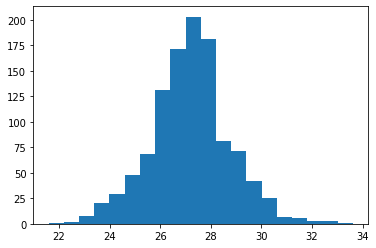

In [35]:
print('z-band distribution of TP:')
plt.hist(tp1['z_LSST_abmag'], bins=20)
plt.show()

In [36]:
# false positive: the difference between tp and pred positive
fp1 = pd.merge(tp1, pred_qso1, on=['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [37]:
fp1.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag,prob_1a_x,prob_1b_x,prob_1c_x,prob_1d_x,prob_1e_x,prob_1f_x,weighted prob_x,prob_1a_y,prob_1b_y,prob_1c_y,prob_1d_y,prob_1e_y,prob_1f_y,weighted prob_y
count,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000
mean,30.822007,30.880877,25.804646,25.224335,25.258145,25.321109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.948274,0.363834,0.946526,0.830295,0.210418,0.812454,0.684132
std,9.301354,11.002321,0.524137,0.539910,0.571445,0.558658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169087,0.425286,0.145392,0.309628,0.303620,0.191278,0.079188
min,26.272934,24.359013,22.696255,22.550955,22.652866,22.452839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600166
25%,28.461504,28.235155,25.482738,24.849746,24.856761,24.946942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.844444,0.000000,0.692308,0.625975
50%,29.361522,29.039727,25.821900,25.288460,25.286673,25.323021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.076923,1.000000,1.000000,0.000000,0.846154,0.656549
75%,30.506022,29.999610,26.160778,25.603959,25.681120,25.771517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.846154,1.000000,1.000000,0.384615,1.000000,0.720544
max,99.989998,99.989998,27.822073,26.589024,26.684883,26.613080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993659


In [38]:
fp1 = fp1.drop(columns=['weighted prob_x', 'prob_1a_x', 'prob_1b_x', 'prob_1c_x', 'prob_1d_x', 'prob_1e_x', 'prob_1f_x'])
fp1.rename(columns={'weighted prob_y': 'weighted prob', 'prob_1a_y': 'prob_1a', 'prob_1b_y': 'prob_1b', 'prob_1c_y': 'prob_1c', 'prob_1d_y': 'prob_1d', 'prob_1e_y': 'prob_1e', 'prob_1f_y': 'prob_1f'}, inplace=True)
fp1.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000
mean,30.822007,30.880877,25.804646,25.224335,25.258145,25.321109,0.948274,0.363834,0.946526,0.830295,0.210418,0.812454,0.684132
std,9.301354,11.002321,0.524137,0.539910,0.571445,0.558658,0.169087,0.425286,0.145392,0.309628,0.303620,0.191278,0.079188
min,26.272934,24.359013,22.696255,22.550955,22.652866,22.452839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600166
25%,28.461504,28.235155,25.482738,24.849746,24.856761,24.946942,1.000000,0.000000,1.000000,0.844444,0.000000,0.692308,0.625975
50%,29.361522,29.039727,25.821900,25.288460,25.286673,25.323021,1.000000,0.076923,1.000000,1.000000,0.000000,0.846154,0.656549
75%,30.506022,29.999610,26.160778,25.603959,25.681120,25.771517,1.000000,0.846154,1.000000,1.000000,0.384615,1.000000,0.720544
max,99.989998,99.989998,27.822073,26.589024,26.684883,26.613080,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993659


In [95]:
false_positive1 = fp1.merge(test1, on=['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag'])
# false_positive1 = false_positive1.drop(columns=['z_LSST_magerr', 'label_y', 'spt_x'])
# false_positive1 = false_positive1.rename(columns={'label_x': 'label', 'spt_y': 'spt'})
false_positive1.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000,4564.000000
mean,30.822007,30.880877,25.804646,25.224335,25.258145,25.321109,0.948274,0.363834,0.946526,0.830295,0.210418,0.812454,0.684132
std,9.301354,11.002321,0.524137,0.539910,0.571445,0.558658,0.169087,0.425286,0.145392,0.309628,0.303620,0.191278,0.079188
min,26.272934,24.359013,22.696255,22.550955,22.652866,22.452839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600166
25%,28.461504,28.235155,25.482738,24.849746,24.856761,24.946942,1.000000,0.000000,1.000000,0.844444,0.000000,0.692308,0.625975
50%,29.361522,29.039727,25.821900,25.288460,25.286673,25.323021,1.000000,0.076923,1.000000,1.000000,0.000000,0.846154,0.656549
75%,30.506022,29.999610,26.160778,25.603959,25.681120,25.771517,1.000000,0.846154,1.000000,1.000000,0.384615,1.000000,0.720544
max,99.989998,99.989998,27.822073,26.589024,26.684883,26.613080,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993659


In [98]:
false_positive1 = false_positive1.rename(columns={'index_y': 'index'}).drop(columns=['index_x'])
print(false_positive1.columns)
false_positive1['index']

Index(['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag',
       'H_WFI_abmag', 'F_WFI_abmag', 'prob_1a', 'prob_1b', 'prob_1c',
       'prob_1d', 'prob_1e', 'prob_1f', 'weighted prob', 'index'],
      dtype='object')


0                      mlt-35-M9
1                      mlt-76-M9
2                     mlt-107-M9
3                     mlt-122-M9
4                     mlt-285-L0
                  ...           
4559    cosmoDC2-9681-2321340-r5
4560    cosmoDC2-9681-3187510-r5
4561    cosmoDC2-9681-3440577-r5
4562    cosmoDC2-9681-3462270-r5
4563    cosmoDC2-9681-4235283-r5
Name: index, Length: 4564, dtype: object

z-band distribution of FP:


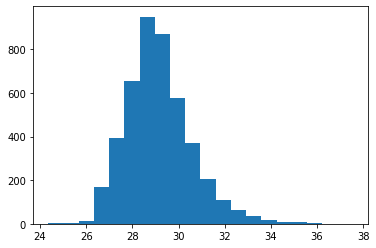

In [40]:
print('z-band distribution of FP:')
plt.hist(false_positive1[false_positive1['z_LSST_abmag']<38.0]['z_LSST_abmag'], bins=20)
plt.show

In [41]:
# false negative: the difference between all positive and predicted true positive
fn1 = pd.merge(tp1, qso_test, on=['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fn1 = fn1.drop(columns=['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f'])
fn1.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag,weighted prob
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,0.0
mean,29.083738,28.052269,25.704483,24.749935,24.706725,24.713590,NaN
std,1.393274,1.213786,0.957600,0.796042,0.857412,0.893167,NaN
min,26.447094,23.713558,21.864300,21.618986,21.569299,21.296802,NaN
25%,28.357156,27.308125,25.361905,24.671830,24.629825,24.588209,NaN
50%,28.636445,27.706841,25.590263,25.022721,24.947409,24.995002,NaN
75%,29.369579,28.665198,26.059163,25.258287,25.183377,25.229282,NaN
max,34.352285,31.260202,29.746760,25.479870,25.455405,25.635804,NaN


z-band distribution of FN:


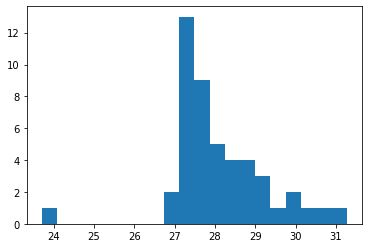

In [42]:
print('z-band distribution of FN:')
plt.hist(fn1['z_LSST_abmag'], bins=20)
plt.show()

In [43]:
print('w/o specific snr constraints, probability prediction results on test 1:\n')
print('precision:', round(tp1.shape[0]/(tp1.shape[0]+fp1.shape[0]), 4))
print('recall:', round(tp1.shape[0]/(tp1.shape[0]+fn1.shape[0]), 4))

w/o specific snr constraints, probability prediction results on test 1:

precision: 0.1944
recall: 0.9591


In [44]:
print('w/o specific snr constraints, probability prediction results on test 1, limit z < 26:\n')
print('precision:', round(tp1[tp1['z_LSST_abmag']<26.0].shape[0]/(tp1[tp1['z_LSST_abmag']<26.0].shape[0]+fp1[fp1['z_LSST_abmag']<26.0].shape[0]), 4))
print('recall:', round(tp1[tp1['z_LSST_abmag']<26.0].shape[0]/(tp1[tp1['z_LSST_abmag']<26.0].shape[0]+fn1[fn1['z_LSST_abmag']<26.0].shape[0]), 4))

w/o specific snr constraints, probability prediction results on test 1, limit z < 26:

precision: 0.9624
recall: 0.9951


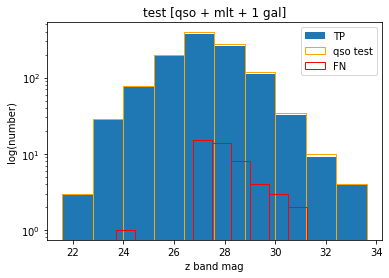

In [45]:
plt.hist(tp1['z_LSST_abmag'], label='TP')
plt.hist(qso_test['z_LSST_abmag'], label='qso test', fill=False, edgecolor='orange')
plt.hist(fn1['z_LSST_abmag'], label='FN', fill=False, edgecolor='red')

plt.xlabel('z band mag')
plt.ylabel('log(number)')
plt.yscale('log')
plt.title('test [qso + mlt + 1 gal]')
plt.legend()
plt.show()

# Test (all)

In [47]:
gal_test0 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117135_J180J255_1130_p0.csv', index_col=False)
gal_test0 = gal_test0.replace(99.99, np.nan).dropna()
gal_test0 = gal_test0[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]
gal_test0.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,117135.000000,117135.000000,117135.000000,117135.000000,117135.000000,117135.000000
mean,28.327183,28.296568,25.967631,25.356401,25.199814,25.096242
std,5.243505,8.413743,0.213501,0.122478,0.153628,0.177850
min,27.212473,26.476851,25.135695,24.529020,24.296207,24.194708
25%,27.667903,26.953354,25.824509,25.295377,25.118279,24.992867
50%,27.829668,27.168758,25.964277,25.387623,25.224115,25.110277
75%,28.089551,27.514382,26.099458,25.450362,25.303319,25.214227
max,99.989998,99.989998,27.347370,25.499996,25.778473,25.801567


In [48]:
gal_test2 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p2.csv', index_col=False)
gal_test2 = gal_test2.replace(99.989998, np.nan).dropna()
gal_test2 = gal_test2[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test3 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p3.csv', index_col=False)
gal_test3 = gal_test3.replace(99.989998, np.nan).dropna()
gal_test3 = gal_test3[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test4 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p4.csv', index_col=False)
gal_test4 = gal_test4.replace(99.989998, np.nan).dropna()
gal_test4 = gal_test4[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test5 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p5.csv', index_col=False)
gal_test5 = gal_test5.replace(99.989998, np.nan).dropna()
gal_test5 = gal_test5[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test6 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p6.csv', index_col=False)
gal_test6 = gal_test6.replace(99.989998	, np.nan).dropna()
gal_test6 = gal_test6[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test7 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p7.csv', index_col=False)
gal_test7 = gal_test7.replace(99.989998, np.nan).dropna()
gal_test7 = gal_test7[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

gal_test9 = pd.read_csv('Pq_test_etg_WFI_abmag_wl_117134_J180J255_1130_p9.csv', index_col=False)
gal_test9 = gal_test9.replace(99.989998, np.nan).dropna()
gal_test9 = gal_test9[['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag', 'index']]

In [23]:
'''
num_rows = len(galaxies_test)
num_sample1 = int(num_rows * frac)
num_sample3 = num_rows - 2*num_sample1

gal_sample1 = galaxies_test.copy().sample(n=num_sample1, replace=False)
remaining_rows = galaxies_test.copy().drop(gal_sample1.index)
gal_sample2 = remaining_rows.sample(n=num_sample1, replace=False)
gal_sample3 = remaining_rows.drop(gal_sample2.index)
'''

In [49]:
gal_test = pd.concat([gal_test0, gal_test2, gal_test3, gal_test4, gal_test5, gal_test6, gal_test7, gal_test9], ignore_index=True)

In [50]:
gal_test.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,937073.000000,937073.000000,937073.000000,937073.000000,937073.000000,937073.000000
mean,28.344750,28.283682,25.968500,25.356067,25.199298,25.096074
std,5.359446,8.355454,0.213157,0.122588,0.153372,0.177604
min,27.173052,26.408033,24.979404,24.482925,24.240412,24.078810
25%,27.667557,26.955429,25.825306,25.295462,25.118246,24.993448
50%,27.830334,27.170858,25.965355,25.387077,25.223955,25.110693
75%,28.089283,27.514488,26.100342,25.449722,25.302822,25.213869
max,99.989998,99.989998,27.525999,25.500000,25.784363,25.946293


In [51]:
gal_test_copy = gal_test.copy().drop(columns=['index'])

In [52]:
# x: z - J
# y: Y - H
testf_1a = [gal_test_copy['z_LSST_abmag']-gal_test_copy['J_WFI_abmag'], gal_test_copy['Y_WFI_abmag']-gal_test_copy['H_WFI_abmag']]
prob_1a = filter1a.predict_proba(np.array(testf_1a).transpose())
print('prediction okay')
# prob_1a: [prob of negative class, prob of positive class]
gal_test_copy['prob_1a'] = prob_1a[:, 1]

prediction okay


In [53]:
# x: Y - H 
# y: i - H

prob_1b = filter1b.predict_proba(np.array([gal_test_copy['Y_WFI_abmag']-gal_test_copy['H_WFI_abmag'], gal_test_copy['i_LSST_abmag']-gal_test_copy['H_WFI_abmag']]).transpose())

gal_test_copy['prob_1b'] = prob_1b[:, 1]

In [54]:
# x: z - H
# y: J - H

prob_1c = filter1c.predict_proba(np.array([gal_test_copy['z_LSST_abmag']-gal_test_copy['H_WFI_abmag'], gal_test_copy['J_WFI_abmag']-gal_test_copy['H_WFI_abmag']]).transpose())

gal_test_copy['prob_1c'] = prob_1c[:, 1]

In [55]:
# x: z - Y
# y: i - Y

prob_1d = filter1d.predict_proba(np.array([gal_test_copy['z_LSST_abmag']-gal_test_copy['Y_WFI_abmag'], gal_test_copy['i_LSST_abmag']-gal_test_copy['Y_WFI_abmag']]).transpose())

gal_test_copy['prob_1d'] = prob_1d[:, 1]

In [56]:
# x: Y - J
# y: J - H

prob_1e = filter1e.predict_proba(np.array([gal_test_copy['Y_WFI_abmag']-gal_test_copy['J_WFI_abmag'], gal_test_copy['J_WFI_abmag']-gal_test_copy['H_WFI_abmag']]).transpose())

gal_test_copy['prob_1e'] = prob_1e[:, 1]

In [57]:
# x: i - Y
# y: J - H

prob_1f = filter1f.predict_proba(np.array([gal_test_copy['i_LSST_abmag']-gal_test_copy['Y_WFI_abmag'], gal_test_copy['J_WFI_abmag']-gal_test_copy['H_WFI_abmag']]).transpose())

gal_test_copy['prob_1f'] = prob_1f[:, 1]

In [58]:
# use best scores as weights:
weights = [0.9882, 0.9938, 0.9463, 0.9678, 0.95, 0.9161]
probabilities = gal_test_copy[['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']]
cols = ['prob_1a', 'prob_1b', 'prob_1c', 'prob_1d', 'prob_1e', 'prob_1f']

wprob = np.zeros(len(probabilities['prob_1a']))
for i in range(len(weights)):
    sum_weights = sum(weights)
    wprob += weights[i]*probabilities[cols[i]]/sum_weights

print(wprob.shape)

(937073,)


In [59]:
gal_test_copy['weighted prob'] = wprob
gal_test_copy.head()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
0,28.008736,27.050222,25.868145,25.395338,25.349953,25.089819,0.0,0.0,0.166667,0.266667,0.307692,0.576923,0.214610
1,27.582060,26.928055,25.805952,25.391806,25.221956,24.979414,0.0,0.0,0.000000,0.044444,0.038462,0.038462,0.019921
2,27.598421,26.773746,25.740219,25.283543,25.109581,24.904301,0.0,0.0,0.000000,0.022222,0.038462,0.038462,0.016188
3,27.707771,27.053661,25.860447,25.476072,25.288433,25.147314,0.0,0.0,0.000000,0.155556,0.000000,0.000000,0.026127
4,28.676924,27.005449,25.522226,25.230698,25.075720,25.011555,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [91]:
gal_fp = gal_test_copy[gal_test_copy['weighted prob'] > 0.6]

In [100]:
gal_fp = gal_fp.merge(gal_test, on=['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag'])
# false_positive1 = false_positive1.drop(columns=['z_LSST_magerr', 'label_y', 'spt_x'])
# false_positive1 = false_positive1.rename(columns={'label_x': 'label', 'spt_y': 'spt'})
gal_fp.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,41.128388,49.847850,25.880037,25.418254,25.369551,25.239718,0.886853,0.492409,0.862910,0.711681,0.465414,0.673783,0.682114
std,27.414334,32.768865,0.261006,0.076570,0.140882,0.163138,0.256113,0.434303,0.238886,0.377758,0.353696,0.235989,0.077413
min,27.373360,26.536684,25.331009,24.858419,24.718040,24.566710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600091
25%,27.778192,27.138864,25.688772,25.384380,25.288645,25.133106,0.923077,0.000000,0.833333,0.266667,0.076923,0.538462,0.621961
50%,28.025576,29.390920,25.833334,25.441075,25.383632,25.238748,1.000000,0.538462,1.000000,1.000000,0.461538,0.653846,0.654507
75%,30.335320,99.989998,26.013277,25.474654,25.464498,25.351453,1.000000,1.000000,1.000000,1.000000,0.807692,0.846154,0.720776
max,99.989998,99.989998,27.308872,25.499928,25.729258,25.789831,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.974636


In [103]:
print(gal_fp.columns)
gal_fp['index']

Index(['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag',
       'H_WFI_abmag', 'F_WFI_abmag', 'prob_1a', 'prob_1b', 'prob_1c',
       'prob_1d', 'prob_1e', 'prob_1f', 'weighted prob', 'index'],
      dtype='object')


0        cosmoDC2-8786-1958286-r1
1        cosmoDC2-8786-2727246-r1
2        cosmoDC2-8786-3155749-r1
3        cosmoDC2-8786-3530290-r1
4        cosmoDC2-8786-3953372-r1
                  ...            
2883    cosmoDC2-10451-3943249-r5
2884    cosmoDC2-10452-2648634-r5
2885    cosmoDC2-10452-3079183-r5
2886    cosmoDC2-10452-5329033-r5
2887    cosmoDC2-10452-5983558-r5
Name: index, Length: 2888, dtype: object

In [67]:
fp = pd.concat([fp1, gal_fp], ignore_index=True).drop_duplicates(['z_LSST_abmag','J_WFI_abmag'], keep='last')
fp.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag,prob_1a,prob_1b,prob_1c,prob_1d,prob_1e,prob_1f,weighted prob
count,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000,7445.000000
mean,34.812996,38.173403,25.833734,25.299359,25.301236,25.289639,0.924399,0.413907,0.914040,0.784124,0.309242,0.758914,0.683365
std,19.212851,23.927827,0.442880,0.435745,0.459125,0.450765,0.209417,0.433326,0.191687,0.342650,0.347010,0.220188,0.078510
min,26.272934,24.359013,22.696255,22.550955,22.652866,22.452839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600091
25%,27.980274,28.051727,25.613947,25.110559,25.094873,25.073669,1.000000,0.000000,0.944444,0.577778,0.000000,0.615385,0.624661
50%,28.970104,29.111770,25.826466,25.412382,25.360226,25.267935,1.000000,0.230769,1.000000,1.000000,0.153846,0.769231,0.656549
75%,30.486628,30.545315,26.087448,25.487984,25.527712,25.510563,1.000000,0.923077,1.000000,1.000000,0.615385,0.961538,0.720638
max,99.989998,99.989998,27.822073,26.589024,26.684883,26.613080,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993659


In [68]:
print('w/o specific snr constraints, probability prediction results on the entire test catalogs:\n')
print('precision:', round(tp1.shape[0]/(tp1.shape[0]+fp.shape[0]), 4))
print('recall:', round(tp1.shape[0]/(tp1.shape[0]+fn1.shape[0]), 4))

w/o specific snr constraints, probability prediction results on the entire test catalogs:

precision: 0.1288
recall: 0.9591


In [124]:
print('w/o specific snr constraints, probability prediction results on the entire test catalogs, limit z < 26:\n')
print('precision:', round(tp1[tp1['z_LSST_abmag']<26.0].shape[0]/(tp1[tp1['z_LSST_abmag']<26.0].shape[0]+fp[fp['z_LSST_abmag']<26.0].shape[0]), 4))
print('recall:', round(tp1[tp1['z_LSST_abmag']<26.0].shape[0]/(tp1[tp1['z_LSST_abmag']<26.0].shape[0]+fn1[fn1['z_LSST_abmag']<26.0].shape[0]), 4))

w/o specific snr constraints, probability prediction results on the entire test catalogs, limit z < 26:

precision: 0.9624
recall: 0.9951


In [115]:
print('w/o specific snr constraints, probability prediction results on the entire test catalogs, limit J < 26.2:\n')
print('precision:', round(tp1[tp1['J_WFI_abmag']<26.2].shape[0]/(tp1[tp1['J_WFI_abmag']<26.2].shape[0]+fp[fp['J_WFI_abmag']<26.2].shape[0]), 4))
print('recall:', round(tp1[tp1['J_WFI_abmag']<26.2].shape[0]/(tp1[tp1['J_WFI_abmag']<26.2].shape[0]+fn1[fn1['J_WFI_abmag']<26.2].shape[0]), 4))

w/o specific snr constraints, probability prediction results on the entire test catalogs, limit J < 26.2:

precision: 0.1303
recall: 0.9591


In [122]:
print('w/o specific snr constraints, probability prediction results on the entire test catalogs, limit 24. < J < 24.5.:\n')
print('precision:', round(tp1[(tp1['J_WFI_abmag']<24.5)&(tp1['J_WFI_abmag']>24.)].shape[0]/(tp1[(tp1['J_WFI_abmag']<24.5)&(tp1['J_WFI_abmag']>24.)].shape[0]+fp[(fp['J_WFI_abmag']<24.5)&(fp['J_WFI_abmag']>24.)].shape[0]), 4))
print('recall:', round(tp1[(tp1['J_WFI_abmag']<24.5)&(tp1['J_WFI_abmag']>24.)].shape[0]/(tp1[(tp1['J_WFI_abmag']<24.5)&(tp1['J_WFI_abmag']>24.)].shape[0]+fn1[(fn1['J_WFI_abmag']<24.5)&(fn1['J_WFI_abmag']>24.)].shape[0]), 4))

w/o specific snr constraints, probability prediction results on the entire test catalogs, limit 24. < J < 24.5.:

precision: 0.2593
recall: 0.9625


In [121]:
print('w/o specific snr constraints, probability prediction results on the entire test catalogs, limit 24.5 < J < 25.:\n')
print('precision:', round(tp1[(tp1['J_WFI_abmag']<25.0)&(tp1['J_WFI_abmag']>24.5)].shape[0]/(tp1[(tp1['J_WFI_abmag']<25.0)&(tp1['J_WFI_abmag']>24.5)].shape[0]+fp[(fp['J_WFI_abmag']<25.0)&(fp['J_WFI_abmag']>24.5)].shape[0]), 4))
print('recall:', round(tp1[(tp1['J_WFI_abmag']<25.0)&(tp1['J_WFI_abmag']>24.5)].shape[0]/(tp1[(tp1['J_WFI_abmag']<25.0)&(tp1['J_WFI_abmag']>24.5)].shape[0]+fn1[(fn1['J_WFI_abmag']<25.0)&(fn1['J_WFI_abmag']>24.5)].shape[0]), 4))

w/o specific snr constraints, probability prediction results on the entire test catalogs, limit 24.5 < J < 25.:

precision: 0.1216
recall: 0.9161


In [123]:
print('w/o specific snr constraints, probability prediction results on the entire test catalogs, limit 25 < J < 25.5:\n')
print('precision:', round(tp1[(tp1['J_WFI_abmag']<25.5)&(tp1['J_WFI_abmag']>25.)].shape[0]/(tp1[(tp1['J_WFI_abmag']<25.5)&(tp1['J_WFI_abmag']>25.)].shape[0]+fp[(fp['J_WFI_abmag']<25.5)&(fp['J_WFI_abmag']>25.)].shape[0]), 4))
print('recall:', round(tp1[(tp1['J_WFI_abmag']<25.5)&(tp1['J_WFI_abmag']>25.)].shape[0]/(tp1[(tp1['J_WFI_abmag']<25.5)&(tp1['J_WFI_abmag']>25.)].shape[0]+fn1[(fn1['J_WFI_abmag']<25.5)&(fn1['J_WFI_abmag']>25.)].shape[0]), 4))

w/o specific snr constraints, probability prediction results on the entire test catalogs, limit 25 < J < 25.5:

precision: 0.0195
recall: 0.7895


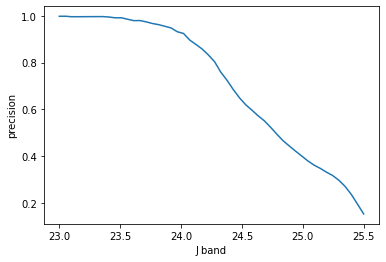

mean, J <= 25.5: 0.7127


In [142]:
def precision(TP, FP, FN, val):
    return round(tp1[tp1['J_WFI_abmag']<val].shape[0]/(tp1[tp1['J_WFI_abmag']<val].shape[0]+fp[fp['J_WFI_abmag']<val].shape[0]), 4)

x = np.linspace(23.0, 25.5, 50)
y = [precision(tp1, fp, fn1, val) for val in x]
plt.plot(x, y)
plt.xlabel('J band')
plt.ylabel('precision')
plt.show()

print('mean, J <= 25.5:', round(np.mean(y), 4))

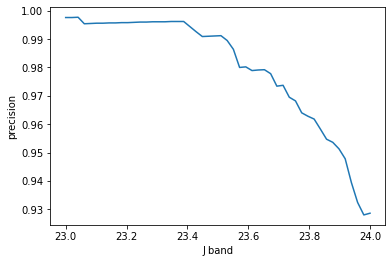

mean, J <= 24.0: 0.9799


In [139]:
x1 = np.linspace(23.0, 24.0, 50)
y1 = [precision(tp1, fp, fn1, val) for val in x1]
plt.plot(x1, y1)
plt.xlabel('J band')
plt.ylabel('precision')
plt.show()

print('mean, J <= 24.0:', round(np.mean(y1), 4))

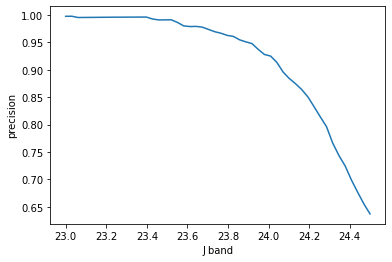

mean, J <= 24.5: 0.9184


In [140]:
x2 = np.linspace(23.0, 24.5, 50)
y2 = [precision(tp1, fp, fn1, val) for val in x2]
plt.plot(x2, y2)
plt.xlabel('J band')
plt.ylabel('precision')
plt.show()

print('mean, J <= 24.5:', round(np.mean(y2), 4))

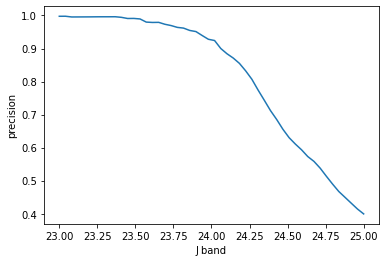

mean, J <= 25.0: 0.8164


In [141]:
x3 = np.linspace(23.0, 25.0, 50)
y3 = [precision(tp1, fp, fn1, val) for val in x3]
plt.plot(x3, y3)
plt.xlabel('J band')
plt.ylabel('precision')
plt.show()

print('mean, J <= 25.0:', round(np.mean(y3), 4))

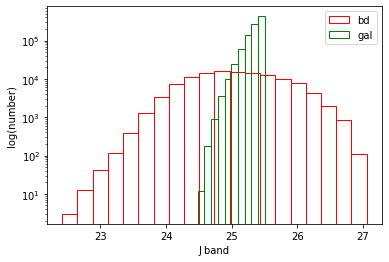

In [133]:
plt.hist(mlt_test['J_WFI_abmag'], bins=20, fill=False, edgecolor='red', label='bd')
plt.hist(gal_test['J_WFI_abmag'], fill=False, edgecolor='green', label='gal')

plt.xlabel('J band')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

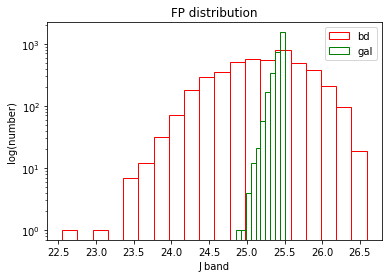

In [135]:
plt.hist(fp1['J_WFI_abmag'], bins=20, fill=False, edgecolor='red', label='bd')
plt.hist(gal_fp['J_WFI_abmag'], fill=False, edgecolor='green', label='gal')

plt.xlabel('J band')
plt.ylabel('log(number)')
plt.yscale('log')
plt.title('FP distribution')
plt.legend()
plt.show()

In [146]:
print('number of quasars at J <= 24.5:', len(qso_test[qso_test['J_WFI_abmag']<=24.5]))
print('number of TP at J <= 24.5:', len(tp1[tp1['J_WFI_abmag']<=24.5]))
print('number of FP at J <= 24.5:', len(fp[fp['J_WFI_abmag']<=24.5]))
print('precision at J <= 24.5:', round(tp1[tp1['J_WFI_abmag']<=24.5].shape[0]/(tp1[tp1['J_WFI_abmag']<=24.5].shape[0]+fp[fp['J_WFI_abmag']<=24.5].shape[0]), 4))

number of quasars at J <= 24.5: 879
number of TP at J <= 24.5: 869
number of FP at J <= 24.5: 495
precision at J <= 24.5: 0.6371


z-band distribution of FP:


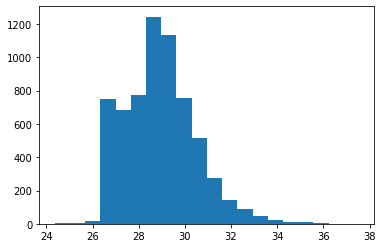

In [70]:
print('z-band distribution of FP:')
plt.hist(fp[fp['z_LSST_abmag']<38.0]['z_LSST_abmag'], bins=20)
plt.show()

J-band distribution of FP:


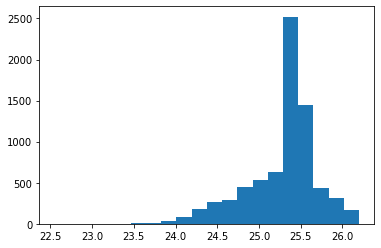

In [116]:
print('J-band distribution of FP:')
plt.hist(fp[fp['J_WFI_abmag']<26.2]['J_WFI_abmag'], bins=20)
plt.show()

In [118]:
qso_test[qso_test['z_LSST_abmag'] < 26.0].describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,26.779768,24.936770,22.191121,22.086880,22.180666,22.048651
std,1.140630,0.827040,1.124415,1.130413,1.171780,1.166264
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814
25%,26.110401,24.376248,21.416100,21.329818,21.407006,21.298916
50%,26.787710,25.102435,22.247488,22.197233,22.300531,22.208140
75%,27.495891,25.599500,23.039798,22.946183,23.047106,22.892758
max,31.010640,25.991503,24.339576,24.213940,24.415078,24.327638


In [119]:
qso_test.describe()

,i_LSST_abmag,z_LSST_abmag,Y_WFI_abmag,J_WFI_abmag,H_WFI_abmag,F_WFI_abmag
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,28.460931,27.229672,23.628574,23.393529,23.487835,23.391884
std,1.432419,1.563199,1.322967,1.274028,1.298215,1.310768
min,23.301932,21.582562,18.962755,18.815153,18.799645,18.621814
25%,27.664371,26.336379,22.706429,22.489887,22.584211,22.473988
50%,28.413087,27.238952,23.732590,23.535600,23.616137,23.514534
75%,29.201439,28.083801,24.641570,24.422242,24.558752,24.462191
max,36.322512,33.615849,29.746760,25.498570,25.671004,25.823568


### export results (index), TP, FP, FN

In [71]:
tp1['index']

0           qsoLF-1
1       qsoLF-24586
2       qsoLF-16397
3       qsoLF-16399
4       qsoLF-24592
           ...     
1096    qsoLF-24535
1097    qsoLF-24539
1098    qsoLF-16362
1099    qsoLF-24559
1100    qsoLF-24569
Name: index, Length: 1101, dtype: object

In [111]:
tp1.to_csv('z pipeline TP', encoding='utf-8')

In [104]:
# indices of false_positive1 and gal_fp
fp = pd.concat([gal_fp, false_positive1])
fp['index']

0       cosmoDC2-8786-1958286-r1
1       cosmoDC2-8786-2727246-r1
2       cosmoDC2-8786-3155749-r1
3       cosmoDC2-8786-3530290-r1
4       cosmoDC2-8786-3953372-r1
                  ...           
4559    cosmoDC2-9681-2321340-r5
4560    cosmoDC2-9681-3187510-r5
4561    cosmoDC2-9681-3440577-r5
4562    cosmoDC2-9681-3462270-r5
4563    cosmoDC2-9681-4235283-r5
Name: index, Length: 7452, dtype: object

In [112]:
fp.to_csv('z pipeline FP', encoding='utf-8')

In [109]:
# fn1
fn1 = fn1.merge(qso_test, on=['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag', 'H_WFI_abmag', 'F_WFI_abmag'])
print(fn1.columns)

Index(['i_LSST_abmag', 'z_LSST_abmag', 'Y_WFI_abmag', 'J_WFI_abmag',
       'H_WFI_abmag', 'F_WFI_abmag', 'weighted prob', 'index_x', 'index_x',
       'index_y'],
      dtype='object')


In [110]:
fn1 = fn1.drop(columns=['index_x'])
fn1 = fn1.rename(columns={'index_y': 'index'})
fn1['index']

0        qsoLF-79
1      qsoLF-8284
2       qsoLF-104
3      qsoLF-8306
4     qsoLF-17388
5     qsoLF-17417
6      qsoLF-9418
7      qsoLF-9792
8      qsoLF-9833
9      qsoLF-1793
10    qsoLF-18237
11    qsoLF-10060
12    qsoLF-18643
13     qsoLF-2342
14    qsoLF-18980
15    qsoLF-10790
16    qsoLF-19411
17    qsoLF-19503
18     qsoLF-3344
19    qsoLF-19754
20    qsoLF-11694
21    qsoLF-11798
22    qsoLF-11928
23    qsoLF-20164
24    qsoLF-20295
25    qsoLF-20519
26    qsoLF-20632
27    qsoLF-12510
28    qsoLF-13142
29    qsoLF-13305
30     qsoLF-5516
31     qsoLF-5862
32    qsoLF-14332
33    qsoLF-22628
34    qsoLF-14616
35    qsoLF-14683
36     qsoLF-6550
37    qsoLF-14922
38     qsoLF-6819
39     qsoLF-6864
40     qsoLF-6891
41     qsoLF-7043
42     qsoLF-7258
43    qsoLF-23753
44     qsoLF-7456
45     qsoLF-7706
46    qsoLF-15979
Name: index, dtype: object

In [113]:
fn1.to_csv('z pipeline FN', encoding='utf-8')